- Smayan Kulkarni
- D100
- 60009230142
- D2-2

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [15]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [16]:

# 2. Define the Neural Network Architecture
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model



In [17]:

# 3. List of Optimizers to Compare
optimizers = {
    'SGD': keras.optimizers.SGD(),
    'SGD with Momentum': keras.optimizers.SGD(momentum=0.9),
    'Adagrad': keras.optimizers.Adagrad(),
    'RMSProp': keras.optimizers.RMSprop(),
    'AdaDelta': keras.optimizers.Adadelta(),
    'Adam': keras.optimizers.Adam(),
}



In [18]:
# Dictionary to store the history of each optimizer
history_dict = {}

# 4. Train the model with each optimizer
EPOCHS = 10
BATCH_SIZE = 128
results = []



In [19]:
for name, optimizer in optimizers.items():
    print(f"\n--- Training with {name} ---")
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(x_test, y_test),
                        verbose=0) # Set to 1 to see epoch-by-epoch progress
    
    history_dict[name] = history
    
    # Evaluate and store the final results
    score = model.evaluate(x_test, y_test, verbose=0)
    results.append((name, score[0], score[1]))
    print(f"Completed: {name}, Test Loss: {score[0]:.4f}, Test Accuracy: {score[1]:.4f}")


--- Training with SGD ---


/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/.conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Completed: SGD, Test Loss: 0.2698, Test Accuracy: 0.9238

--- Training with SGD with Momentum ---
Completed: SGD with Momentum, Test Loss: 0.1002, Test Accuracy: 0.9701

--- Training with Adagrad ---
Completed: Adagrad, Test Loss: 0.4488, Test Accuracy: 0.8911

--- Training with RMSProp ---
Completed: RMSProp, Test Loss: 0.0707, Test Accuracy: 0.9787

--- Training with AdaDelta ---
Completed: AdaDelta, Test Loss: 1.6868, Test Accuracy: 0.5964

--- Training with Adam ---
Completed: Adam, Test Loss: 0.0708, Test Accuracy: 0.9774


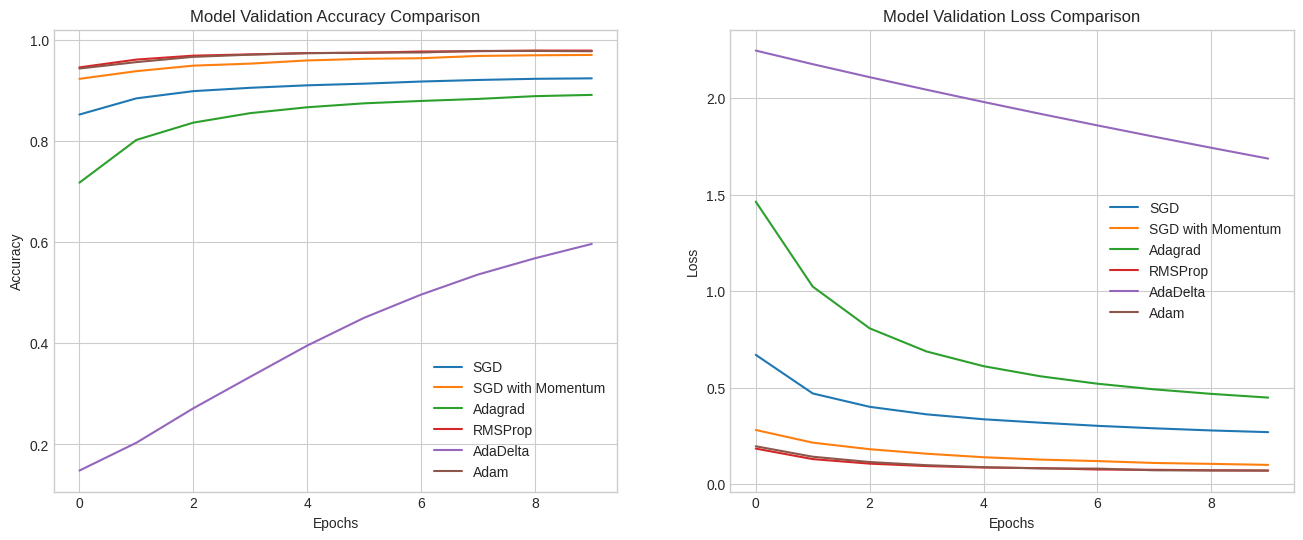

In [20]:

# 5. Plot and Compare Results
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for name, history in history_dict.items():
    ax1.plot(history.history['val_accuracy'], label=name)
ax1.set_title('Model Validation Accuracy Comparison')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

for name, history in history_dict.items():
    ax2.plot(history.history['val_loss'], label=name)
ax2.set_title('Model Validation Loss Comparison')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [21]:
print(history.history['val_accuracy'])
print(history.history['accuracy'])

[0.9431999921798706, 0.9559000134468079, 0.9663000106811523, 0.9706000089645386, 0.9735000133514404, 0.9746000170707703, 0.9750000238418579, 0.9779999852180481, 0.9779999852180481, 0.977400004863739]
[0.8841166496276855, 0.9442999958992004, 0.9568833112716675, 0.9642833471298218, 0.9695666432380676, 0.9725333452224731, 0.9751999974250793, 0.9784666895866394, 0.9803333282470703, 0.9814500212669373]


In [22]:
print("\n" + "="*65)
print(" " * 15 + "Optimizer Performance Comparison")
print("="*65)
print(f"| {'Optimizer':<20} | {'Final Test Loss':<20} | {'Final Test Accuracy':<20} |")
print(f"|{'-'*22}|{'-'*22}|{'-'*22}|")
for name, loss, acc in sorted(results, key=lambda x: x[2], reverse=True): # Sort by accuracy
    print(f"| {name:<20} | {loss:<20.4f} | {acc:<20.4f} |")
print("="*65)


               Optimizer Performance Comparison
| Optimizer            | Final Test Loss      | Final Test Accuracy  |
|----------------------|----------------------|----------------------|
| RMSProp              | 0.0707               | 0.9787               |
| Adam                 | 0.0708               | 0.9774               |
| SGD with Momentum    | 0.1002               | 0.9701               |
| SGD                  | 0.2698               | 0.9238               |
| Adagrad              | 0.4488               | 0.8911               |
| AdaDelta             | 1.6868               | 0.5964               |
